# Titanic Practice 1 - Models

References: https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner


### 1. Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import rcParams
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

### 2. Data Download

In [2]:
data_dir = Path('../../dacon-inputs/titanic/input')
sub_dir = Path('../../dacon-inputs/titanic/sub')
feature_dir = Path('../../dacon-inputs/titanic/feature')

trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
feature_file = feature_dir / 'features_p1.csv'

sample_file = data_dir / 'submission.csv'
# seed = 42

In [3]:
data_dir.resolve()

WindowsPath('C:/Users/bryan/dacon-inputs/titanic/input')

In [4]:
df = pd.read_csv(feature_file, index_col=0)
print(df.shape)
df.head()

(1309, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,CabinBool
PassengerId,,,,,,,,
1,0.0,3,0,22.0,1,0,7.2500,0
2,1.0,1,1,38.0,1,0,71.2833,1
3,1.0,3,1,26.0,0,0,7.9250,0
4,1.0,1,1,35.0,1,0,53.1000,1
5,0.0,3,0,35.0,0,0,8.0500,0


### 3. Split Train/Test Data

In [5]:
target_col = 'Survived'

In [6]:
y = df[target_col].values[:891]
df.drop([target_col] , axis=1, inplace=True)
trn = df.iloc[:891]
tst = df.iloc[891:]
feature_name = df.columns.tolist()
print(y.shape, trn.shape, tst.shape)

(891,) (891, 7) (418, 7)


In [7]:
from sklearn.model_selection import train_test_split

X_trn, X_val, y_trn, y_val = train_test_split(trn, y, test_size=.2, random_state = 0) # 20% of data for testing, random_state = seed?
print(X_trn.shape, X_val.shape, y_trn.shape, y_val.shape)

(712, 7) (179, 7) (712,) (179,)


### 4. Testing Different Models
- Gaussian Naive Bayes
- Logistic Regression
- Support Vector Machines
- Perceptron
- Decision Tree Classifier
- Random Forest Classifier
- KNN or k-Nearest Neighbors
- Stochastic Gradient Descent
- Gradient Boosting Classifier

In [8]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_trn, y_trn)
y_pred = gaussian.predict(X_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Gaussian Naive Bayes:", acc_gaussian)

Gaussian Naive Bayes: 81.01


In [9]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_trn, y_trn)
y_pred = logreg.predict(X_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Logistic Regression:", acc_logreg)

Logistic Regression: 82.12


In [10]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_trn, y_trn)
y_pred = svc.predict(X_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Support Vector Machines:", acc_svc)

Support Vector Machines: 72.07


In [11]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_trn, y_trn)
y_pred = linear_svc.predict(X_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Linear SVC:", acc_linear_svc, "(changes largely)")

Linear SVC: 79.89 (changes largely)


In [12]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_trn, y_trn)
y_pred = perceptron.predict(X_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Perceptron:", acc_perceptron)

Perceptron: 76.54


In [13]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_trn, y_trn)
y_pred = decisiontree.predict(X_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Decision Tree:", acc_decisiontree)

Decision Tree: 78.77


In [14]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_trn, y_trn)
y_pred = randomforest.predict(X_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Random Forest:", acc_randomforest, "(changes slightly)")

Random Forest: 81.56 (changes slightly)


In [15]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_trn, y_trn)
y_pred = knn.predict(X_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print("KNN:", acc_knn)

KNN: 72.63


In [16]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_trn, y_trn)
y_pred = sgd.predict(X_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Stochastic Gradient Descent:", acc_sgd, "(changes largely)")

Stochastic Gradient Descent: 69.83 (changes largely)


In [17]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_trn, y_trn)
y_pred = gbk.predict(X_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Gradient Boosting Classifier:", acc_gbk)

Gradient Boosting Classifier: 84.36


### 5. Comparing Models

In [18]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,84.36
2,Logistic Regression,82.12
3,Random Forest,81.56
4,Naive Bayes,81.01
6,Linear SVC,79.89
7,Decision Tree,78.77
5,Perceptron,76.54
1,KNN,72.63
0,Support Vector Machines,72.07
8,Stochastic Gradient Descent,69.83


### 6. Creating Submission
Using results for the Gradient Boosting Classifier

<AxesSubplot:ylabel='feature'>

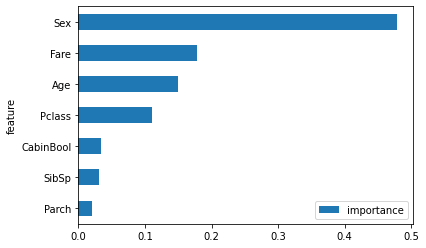

In [23]:
# Visualize Feature Importance
imp = pd.DataFrame({'feature': trn.columns, 'importance': gbk.feature_importances_})
imp = imp.sort_values('importance').set_index('feature')
imp.plot(kind='barh')

In [20]:
tst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Sex        418 non-null    int64  
 2   Age        418 non-null    float64
 3   SibSp      418 non-null    int64  
 4   Parch      418 non-null    int64  
 5   Fare       418 non-null    float64
 6   CabinBool  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 26.1 KB


In [21]:
p_tst = gbk.predict(tst)

In [24]:
# Create Submission File
sub = pd.read_csv(sample_file, index_col=0)
print(sub.shape)
sub.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [25]:
sub[target_col] = p_tst
sub.head()

,Survived
PassengerId,
892,0.0
893,0.0
894,0.0
895,0.0
896,0.0


In [26]:
sub[target_col].value_counts()

0.0    282
1.0    136
Name: Survived, dtype: int64

In [28]:
algo_name = 'p1_gbk'
model_name = f'{algo_name}'

sub_file = sub_dir / f'{model_name}.csv'

In [29]:
# Saving Submission File
sub.to_csv(sub_file)